# 对数据库操作的演示

In [1]:
# 请先配置好数据库连接信息 -> database/config/database-config.txt
# 请先运行该脚本，再运行其他脚本
# 导入数据库依赖文件
import database.utils as db_utils
import database.models as db_models
import database.api as db_api

ModuleNotFoundError: No module named 'yaml'

In [4]:
# 简易化初始化数据库（创建数据库，创建数据表，内容生成）
db_utils.init_database()

2024-05-10 15:08:09,325 - database.utils - WARNING - Database already exists.
2024-05-10 15:08:09,382 - database.utils - INFO - Tables dropped successfully.
2024-05-10 15:08:09,466 - database.utils - INFO - Tables created successfully.
2024-05-10 15:08:09,467 - database.utils - INFO - Start to generate fake data based on the config file.
Adding Admin Data |████████████████████████████████████████| 3/3 [100%] in 0.0s (32051.28/s) 
2024-05-10 15:08:09,474 - database.utils - INFO - Admin data added successfully.
Adding Supplier Data |████████████████████████████████████████| 20/20 [100%] in 0.0s (18005.04/s) 
2024-05-10 15:08:09,483 - database.utils - INFO - Supplier data added successfully.
Adding Vegetable Data |████████████████████████████████████████| 36/36 [100%] in 0.0s (61696.66/s) 
2024-05-10 15:08:09,498 - database.utils - INFO - Vegetable data added successfully.
Adding Customer Data |████████████████████████████████████████| 1500/1500 [100%] in 0.1s (22158.31/s) 
2024-05-10 15:

In [3]:
#使用api获取各类数据DataFrame
vegeDF = db_api.getVegetableDataFrame() # 获取蔬菜数据并转换为 Pandas 的 DataFrame
vegeDF.head()

,vegetable_name,purchase_quantity,purchase_price,supplier_id,selling_price,vip_price
id,,,,,,
1,西红柿,50.0,3.88,19,4.66,4.19
2,黄瓜,100.0,2.61,10,3.13,2.82
3,茄子,50.0,3.48,2,4.17,3.75
4,土豆,200.0,0.98,6,1.18,1.06
5,胡萝卜,50.0,1.39,7,1.67,1.50


In [5]:
# 使用api实用小工具
# 获取所有顾客男女人数
db_api.getCustomerGenderCounts()

{'male': 434, 'female': 1066}

In [2]:
# 获取某个蔬菜的评价词汇频率总汇
db_api.getReviewWordFrequency('豆角')

{'great': 3,
 'fresh': 9,
 'Good': 9,
 'worse': 4,
 'good': 5,
 'Wow': 3,
 'Fresh': 3}

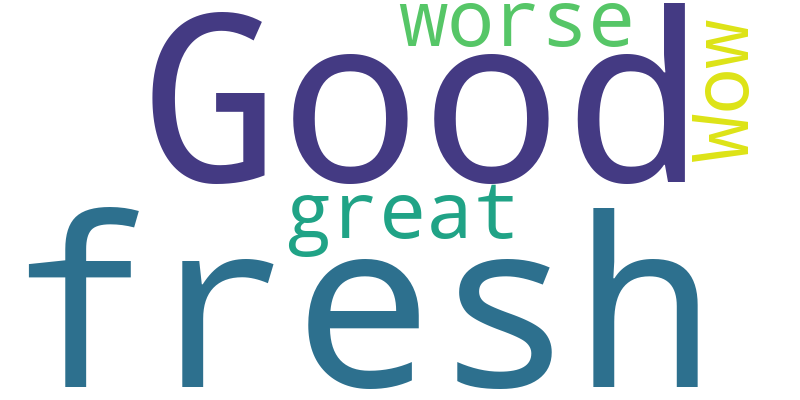

In [5]:
# 制作云图
import wordcloud as wc

cloudText = ' '.join(db_api.getReviewWordFrequency('豆角').keys())
wordCloud = wc.WordCloud(width=800, height=400, background_color='white').generate(cloudText)
wordCloud.to_file('./imgs/豆角评价.png')
wordCloud.to_image() # 显示图片